In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

import matplotlib
matplotlib.rcParams['figure.dpi'] = 100
f_path = "/System/Library/Fonts/Helvetica.ttc"
font_name = fm.FontProperties(fname=f_path).get_name()
rc('font', family=font_name, size=13)

In [111]:
df = pd.read_pickle('../dataset/03_Final_dataframe/df_ddo_including_only_truebeliefs(N197306).p')
#df = pd.read_pickle('../dataset/04_K-fold_dataset/df_train_idx1.p')

In [112]:
df_dup = df[df.duplicated()]

In [123]:
len(df_dup)/len(df)

0.02533627968738913

In [114]:
# Group by date and count entries
date_counts = df['debate_date'].value_counts().sort_index()
# For resampling by week or month you can use:
# For weekly data points
weekly_counts = df.resample('W', on='debate_date').size()

# For monthly data points
monthly_counts = df.resample('M', on='debate_date').size()
monthly_counts_dup = df_dup.resample('M', on='debate_date').size()


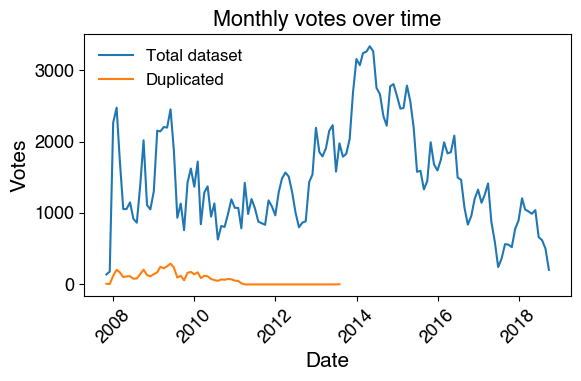

In [122]:
plt.figure(figsize=(6,4))
plt.plot(monthly_counts.index, monthly_counts.values, '-', label='Total dataset')
plt.plot(monthly_counts_dup.index, monthly_counts_dup.values, '-', label='Duplicated')  

plt.title('Monthly votes over time')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Votes', fontsize=15)
plt.legend(frameon=False, fontsize=12)

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

In [4]:
df2 = pd.read_pickle('../dataset/03_Final_dataframe/df_ddo_including_only_truebeliefs_nodup(N192307).p')

In [5]:
df2.head()

,debate_key,debate_title,username,debate_date,position,is_belief,belief_statement
1,.-Audis-are-junkers-except-to-rich-kids-with-l...,". Audis are junkers, except to rich kids with ...",Max.Wallace,2014-09-04,Pro,1.0,I agree with the following: . Audis are junker...
2,....-Former-Secretary-of-State-Madeleine-Albri...,"....""Former Secretary of State Madeleine Albri...",Lookingatissues,2017-01-30,Pro,1.0,"I agree with the following: ....""Former Secret..."
3,...Words-can-t-hurt-me-any./1/,...Words can't hurt me any.,NonInDelicto,2007-12-19,Pro,1.0,I agree with the following: ...Words can't hur...
4,.9-repeated-is-equal-to-1./1/,.9 repeated is equal to 1.,cowpie1998,2011-04-07,Pro,1.0,I agree with the following: .9 repeated is equ...
5,.99-is-equal-to-one./1/,.99 is equal to one.,SweetCrackerJack,2013-12-24,Pro,1.0,I agree with the following: .99 is equal to one.


In [6]:
df2['username'].value_counts()

lannan13        2251
RoyLatham       1180
16kadams        1052
imabench         767
vi_spex          751
                ... 
Alizp98            1
argueMINT          1
sharklotte         1
Ponyrider660       1
pknight800         1
Name: username, Length: 40280, dtype: int64